In [3]:
import pandas as pd
df = pd.read_csv("./add.csv")
df.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


Text(0.5, 1.0, ' X Versus Sum By Pratham Morye')

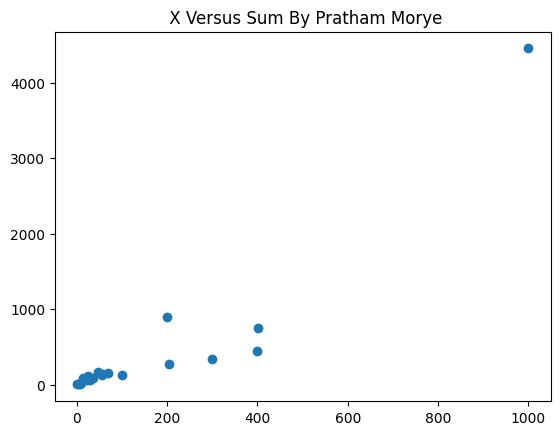

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df["x"],df["sum"])
plt.title(" X Versus Sum By Pratham Morye")

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[["x", "y"]],df["sum"],test_size=0.2)
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)
result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
result

,Actual,Predicted
12,69.2,69.2
7,122.0,122.0
3,20.0,20.0
19,756.5,756.5
0,2.0,2.0


In [6]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root = tk.Tk()
root.title("Add Two numbers using LR, BY Pratham Morye.")
root.geometry('800x400')

def predict_sum():
    try:
        x = float(entry_x.get())
        y = float(entry_y.get())
        input_df = pd.DataFrame({
            'x': [x],
            'y': [y]
        })
        sum_prediction = reg.predict(input_df)
        label_prediction.config(text=f"Predicted Sum: {sum_prediction[0]:.2f}")
    except ValueError:
        label_prediction.config(text="Please enter valid numbers.")

label_entry = tk.Label(root, text="Enter X and Y values:")
label_entry.pack(pady=10)
entry_x = tk.Entry(root, width=10)
entry_x.pack()        
entry_y = tk.Entry(root, width=10)
entry_y.pack()
button_predict = tk.Button(root, text="Predict sum", command=predict_sum)
button_predict.pack(pady=10)
label_prediction = tk.Label(root, text="")
label_prediction.pack(pady=10)

tk.mainloop()

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tkinter as tk

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train using built-in LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_builtin = reg.predict(X_test)
score_builtin = r2_score(y_test, y_pred_builtin)

# Custom Linear Regression class
class MyLinearRegression:
    def __init__(self):
        self.coef = None
        self.intercept = None

    def fit(self, X_train, y_train):
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        # β=(X^T * X)^-1* X^T*y
        self.coef = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept = self.coef[0]
        self.coef = self.coef[1:]

    def predict(self, X_test):
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]
        return X_test @ np.concatenate(([self.intercept], self.coef))

# Train using custom LinearRegression
custom_reg = MyLinearRegression()
custom_reg.fit(X_train, y_train)
y_pred_custom = custom_reg.predict(X_test)
score_custom = r2_score(y_test, y_pred_custom)

# Tkinter GUI
root = tk.Tk()
root.title("Diabetes Prediction By Aditya Mishra")
root.geometry('600x300')

def predict_sum():
    try:
        index = int(entry_index.get())
        input_data = X[index].reshape(1, -1)
        prediction = custom_reg.predict(input_data)
        label_prediction.config(text=f"Custom Model Prediction: {prediction[0]:.2f}\n"
                                     f"Built-in R2 Score: {score_builtin:.2f}\n"
                                     f"Custom R2 Score: {score_custom:.2f}\n"
                                     f"Custom Coefficients: {custom_reg.coef}\n"
                                     f"Custom Intercept: {custom_reg.intercept:.2f}")
    except ValueError:
        label_prediction.config(text="Please enter a valid index.")

label_entry = tk.Label(root, text="Enter index (0-441):")
label_entry.pack(pady=10)
entry_index = tk.Entry(root, width=10)
entry_index.pack()
button_predict = tk.Button(root, text="Predict", command=predict_sum)
button_predict.pack(pady=10)
label_prediction = tk.Label(root, text="")
label_prediction.pack(pady=10)
tk.mainloop()


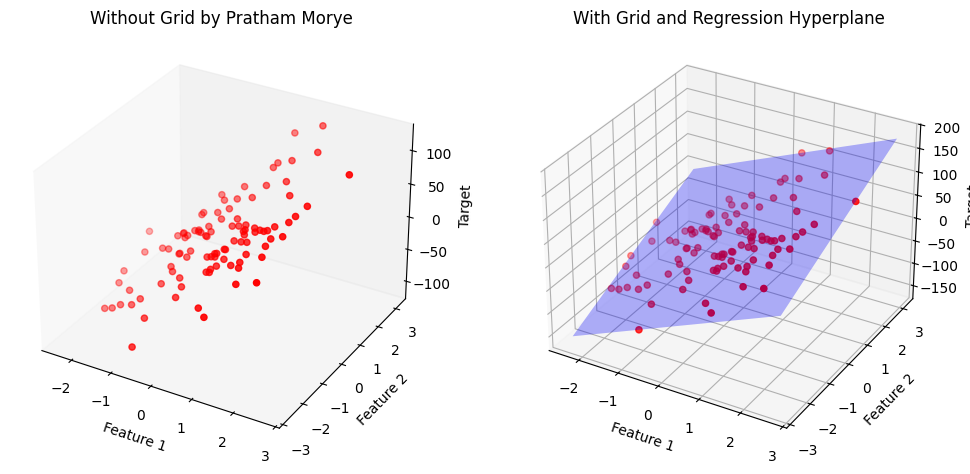

Mean Absolute Error: 0.09
Mean square Error: 0.01
R2 Score: 1.00
Intercept: 0.02, Coefficients: [35.87288328 25.3609945 ]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
# Create dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# Train, Test, Predict using LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
# 3D Scatter Plot without grid
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Target')
ax1.set_title("Without Grid by Pratham Morye")
ax1.grid(False)  # Disable grid
# 3D Scatter Plot with grid and hyperplane
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Target')
ax2.set_title("With Grid and Regression Hyperplane")
ax2.grid(True)  # Enable grid
# Define the plane (hyperplane) based on the coefficients
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
z_surf = reg.intercept_ + reg.coef_[0] * x_surf + reg.coef_[1] * y_surf
# Plot the hyperplane
ax2.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.3, rstride=100, cstride=100)
plt.show()
# Calculate errors and r2_score
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}\
\nMean square Error: {mean_squared_error(y_test, y_pred):.2f}\
\nR2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"Intercept: {reg.intercept_:.2f}, Coefficients: {reg.coef_}")




In [11]:

import pandas as pd
df = pd.read_csv("./add.csv")
df.head()
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
X_train, X_test, Y_train, Y_test = train_test_split(df[["x", "y"]],df["sum"],test_size=0.2)
class MyLinearRegression:
    def __init__(self):
        self.coef = None
        self.intercept = None

    def fit(self, X_train, y_train):
        # Add a column of ones for the intercept term
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        # β=(X^T * X)^-1* X^T*y
        self.coef = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        # Extract intercept and coefficients
        self.intercept = self.coef[0]
        self.coef = self.coef[1:]

    def predict(self, X_test):
        # Add a column of ones for the intercept term
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]
        # Predict using intercept and coefficients
        return X_test @ np.concatenate(([self.intercept], self.coef))

reg = MyLinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)
score = r2_score(Y_test, Y_predict) 

import tkinter as tk
root = tk.Tk()
root.title("Add Two numbers using LR, BY Pratham Morye.")
root.geometry('800x400')
def predict_sum():
    try:
        x = float(entry_x.get())
        y = float(entry_y.get())
        input_df = pd.DataFrame({
            'x': [x],
            'y': [y]
        })
        sum_prediction = reg.predict(input_df)
        label_prediction.config(text=f"Predicted Sum: {sum_prediction[0]:.2f}\
        \nR2 Score = {score}\nCoefficients={reg.coef}\nIntercept ={reg.intercept}")
    except ValueError:
        label_prediction.config(text="Please enter valid numbers.")
label_entry = tk.Label(root, text="Enter X and Y values:")
label_entry.pack(pady=10)
entry_x = tk.Entry(root, width=10)
entry_x.pack()        
entry_y = tk.Entry(root, width=10)
entry_y.pack()
button_predict = tk.Button(root, text="Predict sum", command=predict_sum)
button_predict.pack(pady=10)
label_prediction = tk.Label(root, text="")
label_prediction.pack(pady=10)
tk.mainloop()
